In [13]:
import os
import warnings  # to filter warnings which is quite annoying to look at.
# To perform various mathematical operations and tools to operate on nd arrays
import numpy as np
import pandas as pd  # To import and analyze data
import matplotlib.pyplot as plt  # for visualisation
import seaborn as sns  # for visualisation
import pickle  # To save data or python objects from primary memory to disk and store it in a binary format vice versa
# Natural language processing toolkit used for vectorisation and preprocesssing data.
import nltk
%matplotlib inline
# Output of plotting commands to be displayed inline in the jupyter notebook.
warnings.filterwarnings('ignore')

In [14]:
dataset = pd.read_csv("crop_nutrient.csv")


In [15]:
x=dataset.drop(["crop"],axis=1)
print(x)

     Percentrefuse  Protein   Lipid  Energy     Ca     Fe     Mg     Ph  \
0             60.0   21.220  49.420  2408.0  264.0   3.72  268.0  484.0   
1              0.0   17.600  15.900   337.0  646.0  36.96  170.0  440.0   
2             10.0    0.260   0.170   218.0    6.0   0.12    5.0   11.0   
3              7.0    1.400   0.390   201.0   13.0   0.39   10.0   23.0   
4             60.0    3.270   0.150    47.0   44.0   1.28   60.0   90.0   
..             ...      ...     ...     ...    ...    ...    ...    ...   
109           55.0   15.230  65.210  2738.0   98.0   2.91  158.0  346.0   
110           48.0    0.610   0.150   127.0    7.0   0.24   10.0   11.0   
111            0.0   11.728   1.854  1405.0   31.2   3.97  115.8  409.2   
112           14.0    1.530   0.170   118.0   17.0   0.54   21.0   55.0   
113           14.0    1.460   0.400    98.0    9.0   0.98   24.0   51.0   

          K    Na  ...  deltaT  VitC  Thiamin  Riboflavin  Niacin  \
0     705.0   1.0  ...    0.05

In [16]:
y=dataset["crop"]
print(y)

0          almond
1        aniseetc
2           apple
3         apricot
4       artichoke
          ...    
109        walnut
110    watermelon
111         wheat
112           yam
113        yautia
Name: crop, Length: 114, dtype: object


In [17]:
dataset.dtypes

crop              object
Percentrefuse    float64
Protein          float64
Lipid            float64
Energy           float64
Ca               float64
Fe               float64
Mg               float64
Ph               float64
K                float64
Na               float64
Zn               float64
Cu               float64
Fl               float64
Mn               float64
Se               float64
VitA             float64
betaC            float64
alphaC           float64
VitE             float64
Crypto           float64
Lycopene           int64
Lutein           float64
betaT            float64
gammaT           float64
deltaT           float64
VitC             float64
Thiamin          float64
Riboflavin       float64
Niacin           float64
Pantothenic      float64
VitB6            float64
Folate           float64
VitB12           float64
VitK             float64
dtype: object

In [18]:
y.value_counts()

cassava       1
rapeseed      1
sunflower     1
garlic        1
tangetc       1
             ..
melonseed     1
date          1
rye           1
soybean       1
peppermint    1
Name: crop, Length: 114, dtype: int64

In [20]:
## Train Test Split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle="False") 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(91, 34)
(91,)
(23, 34)
(23,)


In [30]:
### Random Forests classifier



from sklearn.ensemble import RandomForestClassifier 

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(x_train,y_train)
pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score

a=accuracy_score(y_test, pred)
print(a)

X = [[60,3.27,0.15,47,44,1.28,60,90,370,94,0.49,0.231,0,0.256,0.2,13,8,0,0.19,0,0,464,0,0,0,11.7,0.072,0.066,1.046,0.338,0.116,68,0,14.8]]
y=classifier.predict(X)
print(y)

0.0
['chicory']


In [31]:
### Calculating accuracy


from sklearn.metrics import accuracy_score

a=accuracy_score(y_test, pred)
print(a)


0.0


Train confusion matrix
Test confusion matrix


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

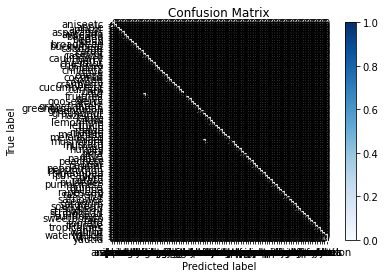

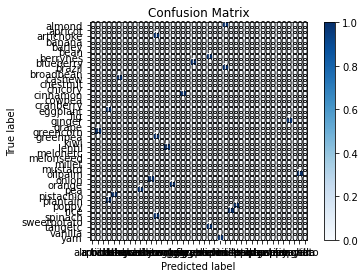

In [33]:
import scikitplot as splot
print("Train confusion matrix")
splot.metrics.plot_confusion_matrix(y_train, classifier.predict(x_train))

print("Test confusion matrix")
splot.metrics.plot_confusion_matrix(y_test, classifier.predict(x_test))

In [35]:
## Predicting classes for discrete instances
x = [[60,3.27,0.15,47,44,1.28,60,90,370,94,0.49,0.231,0,0.256,0.2,13,8,0,0.19,0,0,464,0,0,0,11.7,0.072,0.066,1.046,0.338,0.116,68,0,14.8]]
y=classifier.predict(x)
print(y)


['chicory']
